"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=Data/acidcar.fasta
Alignment with 16 rows and 542 columns
-MVLTST-----LLQSLPSDNITLLLFTFSSLISLFFLK----W...LYM XP_044507658.1
-MVLTST-----FLQSLPSDNITLLLFTFSSLISLFFLK----W...LYM XP_044478142.1
-MFLTST-----LLQSLPSDNITLLLFTFSSLISLFFLK----W...LYM XP_044478149.1
-MFLTST-----LLQSLPSDNITLLLFTFSSLISLFFLK----W...LYM XP_044507843.1
MMQLTIHGSGWWEGISKNNNELAMVIVTISAIMLAILWY----K...LYN XP_043611739.1
MAQIINNDHGSWWWQAESNNELTLAVITILVLILLLYKF----L...--- XP_043624606.1
------------------MQVLILLSLAFLASCVVA------YS...--- A0A1D8QMD1.1
------------------MQVLILLSLAFLASCVVA------YS...--- A0A0S1TPC7.1
------------------MQLFIILSLAFIAAWVVYSR-WSEYS...--- A0A1D8QMG4.1
------------------MQLMIVLSLAFLAACLVY-------S...--- XP_042016944.1
------------------MDAFVVFSLAFLAAWFIVVFPRWSDS...--- A0A1D8QMD2.1
------------------MATFLLYIAALIAAWAVVVF-----S...--- XP_042013463.1
----------------MVASLFLVFSLAFIAAWALGLL-----S...--- XP_042011448.1
------------------MNDLVLLIVALIALWAS

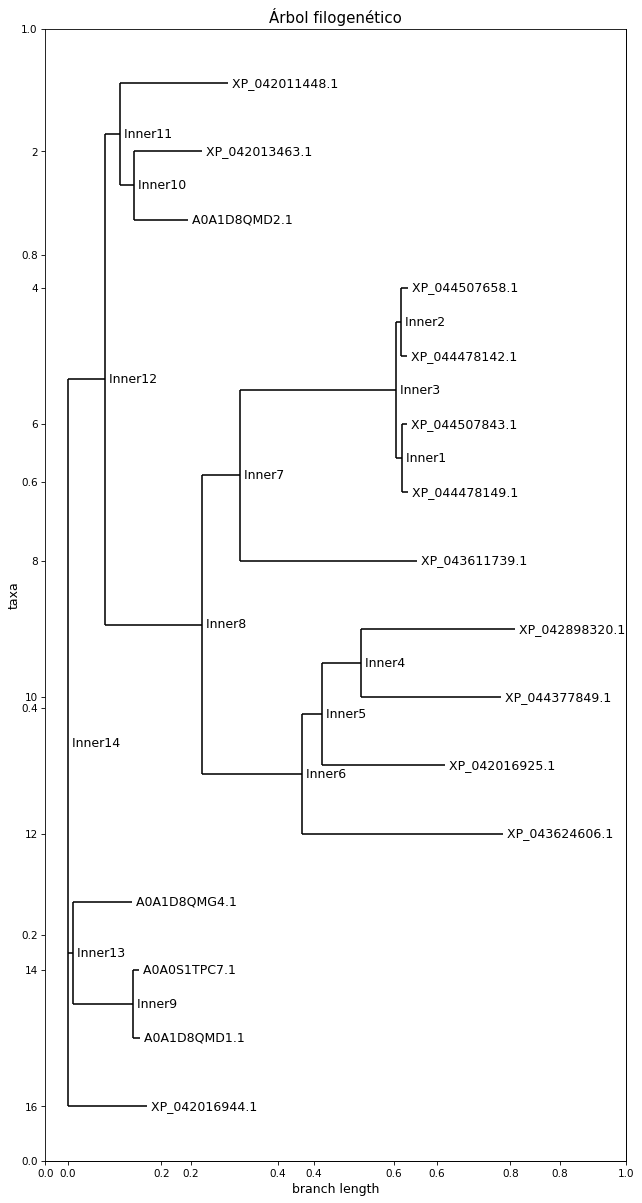

In [7]:
#Cargo mi data en mi notebook 
#Se tomó desde el segundo ID porque al tomar el primero la cadena me presentaba problemas y no me permitía 
#correr el código correctamente.
from Bio import SeqIO 
from Bio import AlignIO
from Bio import Phylo


#Para alineamiento de secuencia 
from Bio.Align.Applications import ClustalwCommandline
import os
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/acidcar.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
# Leer alineamiento
ClustalAlign = AlignIO.read("data/acidcar.aln", "clustal")
print(ClustalAlign)
# Generar Dendogram (Tree)
from Bio import Phylo
tree = Phylo.read("data/acidcar.dnd", "newick")
Phylo.draw_ascii(tree)
#Para la construcción del árbol 
#Cargo mi alineamiento
# cargar alineamiento 
with open("data/acidcar.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
# Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)
# Inicializar el constructor del arbol 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
staphy1_tree = constructor.build_tree(alignment)
staphy1_tree.rooted = True
print(staphy1_tree)
# Guardar el arbol 
Phylo.write(staphy1_tree, "data/carnocia.xml", "phyloxml")

staphy1_tree = Phylo.read(file="data/carnocia.xml", format= "phyloxml")

# Arbol  en Matplotlib
import matplotlib
import matplotlib.pyplot as plt

#Para tener eficiente visualización se utiliza el siguiente código 
fig = plt.figure(figsize=(10, 20), dpi=75) 
matplotlib.rc('font', size=12)              
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10) 
plt.title("Árbol filogenético")   # Establece el título del gráfico

axes = fig.add_subplot(1, 1, 1)
Phylo.draw(staphy1_tree, axes=axes)
fig.savefig("data/carnocia.png")

In [1]:
import Alternativa2 as msc
help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module Alternativa2:

download_pubmed(keyword)

Help on function mining_pubs in module Alternativa2:

mining_pubs(tipo, archivo)



In [2]:
import re
iv=msc.download_pubmed('carnosic acid')
ni=re.findall(r'[DIMP]{4}\-.*\d\n',iv)
print ('El número de artículos es: ', len(ni))


El número de artículos es:  543


In [3]:
print ('Data de countries')
j=msc.mining_pubs('AD',iv)
print(j[0:57])

Data de countries
                     Country  num_auth
0                  Argentina        17
1                  Australia        19
2                 Bangladesh         1
3                    Belgium        13
4                     Brazil        52
5                     Canada        27
6                Switzerland         7
7                      Chile        23
8                      China       432
9                     Cyprus         3
10            Czech Republic         5
11                   Germany        34
12                   Denmark         8
13                   Algeria         9
14                     Egypt        33
15                     Spain       121
16                    France        86
17            United Kingdom         6
18                   Georgia         2
19             French Guiana         1
20                    Greece        29
21                  Honduras         1
22                   Croatia        12
23                   Ireland        16
24     

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv as csv

Fig.3 Nube de Puntos


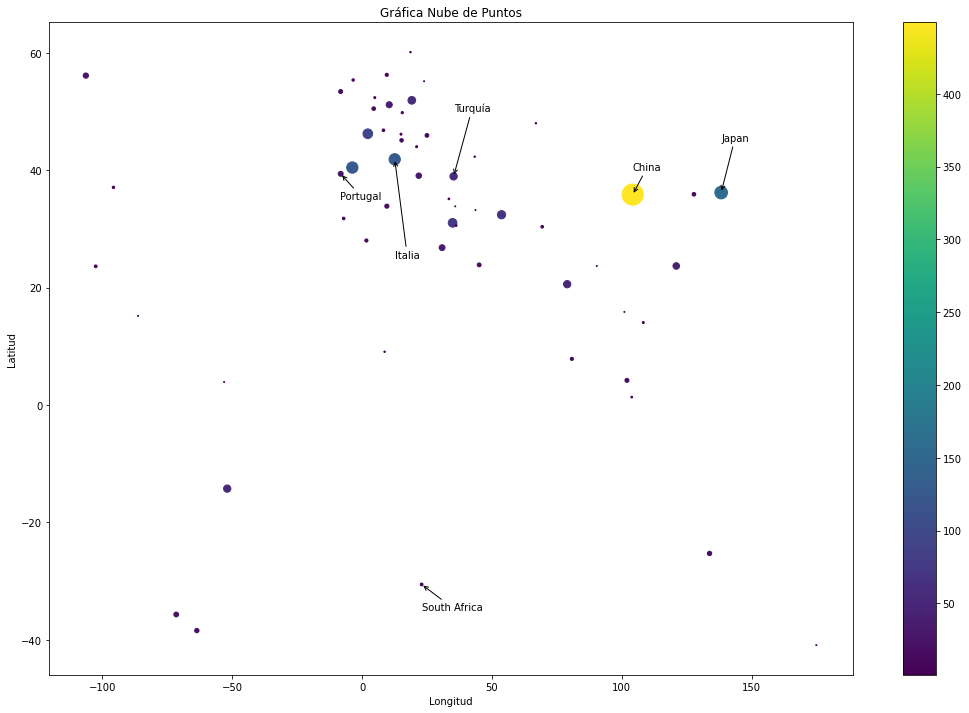

In [7]:
#LITERAL C
import matplotlib.pyplot as plot
print ('Fig.3 Nube de Puntos')
z= j.iloc[:,0]
su=pd.Series(z)
ip = j.iloc[:,1]
mi = pd.Series(ip)
s = mi.tolist()
coordinadas = {}
with open('Data/paises.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        coordinadas[row['nombre']] = [float(row['latitud']),
                                           float(row['longitud'])]
code = []
longitud = []
latitud = []
count = s
for inte in su:
    if inte in coordinadas.keys():
        code.append(inte)
        latitud.append(coordinadas[inte][0])
        longitud.append(coordinadas[inte][1])

plt.scatter(longitud, latitud, s = count, c= count)
plt.colorbar()

ard = dict(arrowstyle="->")
plot.annotate("Portugal", xy= ( -8.224454, 39.399872), 
            xytext = (-8.33, 35), arrowprops = ard)
plot.annotate("Japan", xy = (138.252924, 36.204824), 
            xytext = (138.26,45), arrowprops = ard) 
plot.annotate("South Africa", xy= (22.93750, -30.559482), 
            xytext = (23, -35), arrowprops = ard)
plot.annotate("Turquía", xy= (35.243322, 38.963745), 
            xytext = (35.35, 50), arrowprops = ard)
plot.annotate("China", xy= (104.195397, 35.86166), 
            xytext = (104.25, 40), arrowprops = ard)
plot.annotate("Italia", xy= (12.56738, 41.87194), 
            xytext = (12.60, 25), arrowprops = ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Gráfica Nube de Puntos')
plt.show()
